# Post-processing of the data
Now that we have the data processed and as a result of those we are left with text files for the times, longitudes and latitudes of sunspots, which are direct measurements from the data, we are ready to obtain indirect measurements from them, such as angular speeds and everything that may be acquired from the data sets text files.

These text files with the data are stored as follows (paths are relative to the location of this notebook):

    results
    ├── set1
    │   ├── set1_latitudes_0.txt
    │   ├── set1_latitudes_1.txt
    │   ├── set1_longitudes_0.txt
    │   ├── set1_longitudes_1.txt
    │   └── set1_times.txt
    ├── set2
    │   ├── set2_latitudes_0.txt
    │   ├── set2_latitudes_1.txt
    │   ├── set2_longitudes_0.txt
    │   ├── set2_longitudes_1.txt
    │   └── set2_times.txt
    ...

    10 directories, 32 files
    
Where the number after the "_" character means the index of spots, in case the data was acquired for more than 1 spot per image/data set.

In [1]:
# basic python modules and tools
import numpy as np
import matplotlib.pyplot as plt

## Measuring sun rotation from a single set

In [57]:
# Extracting data from saved files
setstr = "set9"  # name of the directory for the set
longitudes_0 = np.loadtxt("results/"+setstr+"/"+setstr+"_longitudes_0.txt")
#longitudes_1 = np.loadtxt("results/"+setstr+"/"+setstr+"_longitudes_1.txt") # set1
latitudes_0 = np.loadtxt("results/"+setstr+"/"+setstr+"_latitudes_0.txt")
#latitudes_1 = np.loadtxt("results/"+setstr+"/"+setstr+"_latitudes_1.txt") # set1
times = np.loadtxt("results/"+setstr+"/"+setstr+"_times.txt")

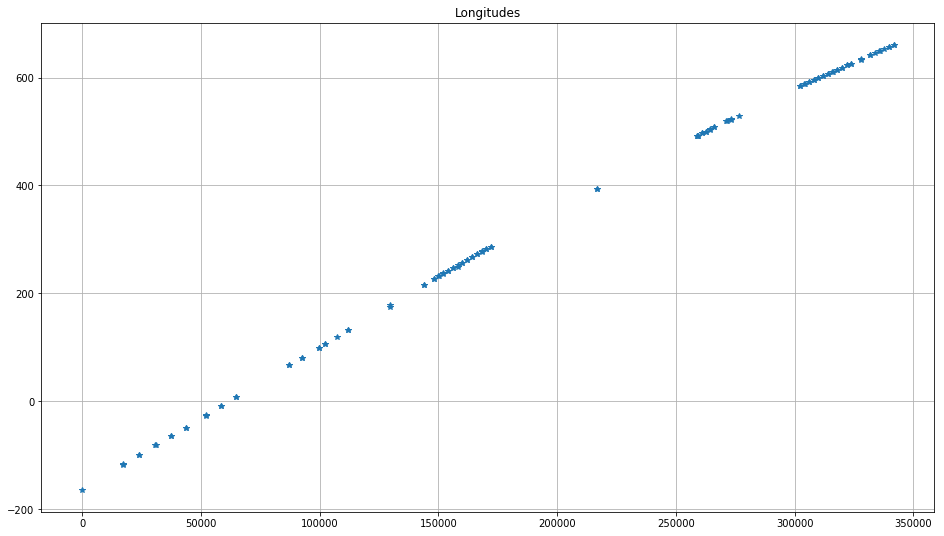

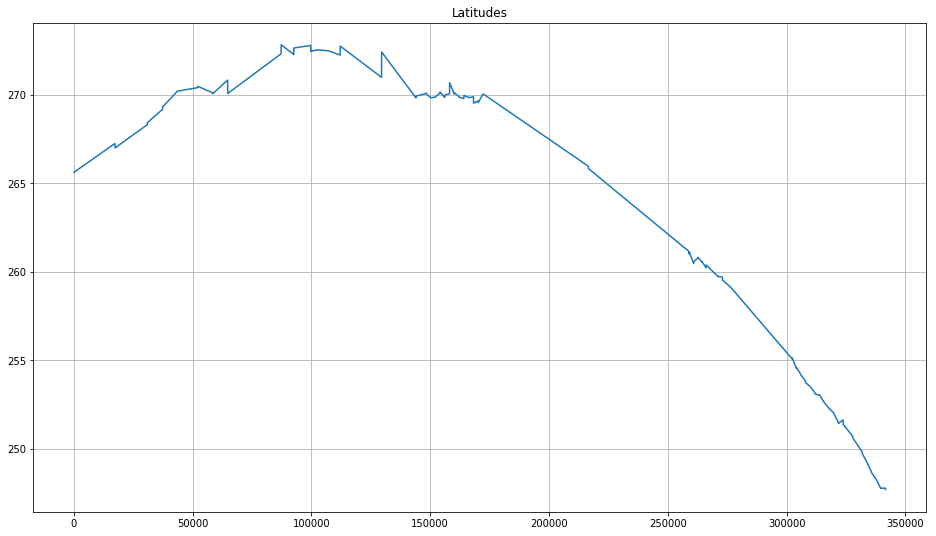

In [58]:
# Plot longitudes and latitudes over time
%matplotlib inline
plt.figure(figsize=(16,9))
plt.title("Longitudes")
plt.grid(True)
plt.plot(times, longitudes_0, '*')
#plt.plot(times, longitudes_1, '+') #set1
plt.figure(figsize=(16,9))
plt.title("Latitudes")
plt.grid(True)
plt.plot(times,latitudes_0)
# plt.plot(times,latitudes_1) #set1

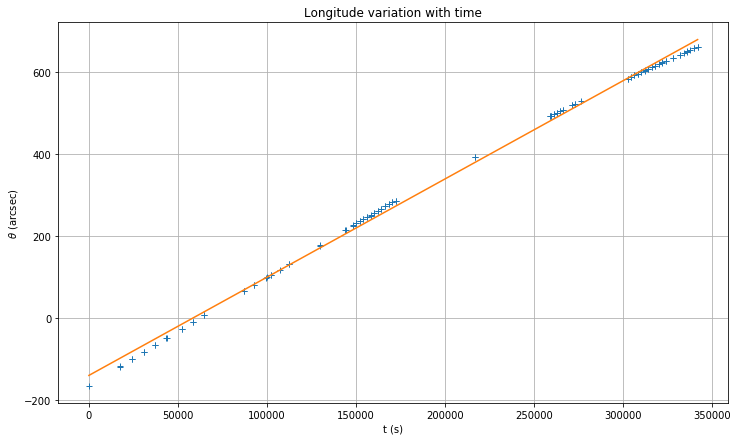

In [59]:
# Linear Fitting longitude variations (assumed constant speed)
# First spot
velocity_0, initial_long_0 = np.polyfit(times[0:], longitudes_0[0:], 1)
Y_0 = velocity_0*times[0:]+initial_long_0
plt.figure(figsize=(12,7))
plt.grid(True)
plt.title(r"Longitude variation with time")
plt.xlabel(r"t (s)")
plt.ylabel(r"$\theta$ (arcsec)")
plt.plot(times,longitudes_0, '+')
plt.plot(times[0:], Y_0)
# Second spot (optional) set1
#velocity_1, initial_long_1 = np.polyfit(times[0:], longitudes_1[0:], 1)
#Y_1 = velocity_1*times[0:]+initial_long_1
#plt.figure(figsize=(12,7))
#plt.grid(True)
#plt.title(r"Longitude variation with time")
#plt.xlabel(r"t (s)")
#plt.ylabel(r"$\theta$ (arcsec)")
#plt.plot(times,longitudes_1, '+')
#plt.plot(times[0:], Y_1)

In [60]:
velocity_0

0.0023951490821210977

In [11]:
velocity_1

0.0019225695781728402

In [12]:
np.average(latitudes_0)

214.99586086790865

In [13]:
np.average(latitudes_1)

367.22301433897024

In [14]:
np.std(latitudes_0)

6.9561147998994732

In [15]:
np.std(latitudes_1)

6.1521655118468495

In [16]:
# To be run only once to store all values
velocities = []
latitudes = []

In [61]:
# Storing latitudes and velocities values
velocities.append(velocity_0)
#velocities.append(velocity_1) # set1
latitudes.append(np.average(latitudes_0))
#latitudes.append(np.average(latitudes_1)) # set1

In [62]:
velocities

[0.0021698880536643326,
 0.0019225695781728402,
 0.0019426074714185768,
 0.0023816984700094444,
 0.002529853653596779,
 0.002386796953480254,
 0.002523439066072873,
 0.0023951490821210977]

In [63]:
latitudes

[214.99586086790865,
 367.22301433897024,
 133.22585739028415,
 194.35380405977358,
 79.252459275553775,
 -125.67480922555596,
 49.852721876277002,
 262.75592955267342]

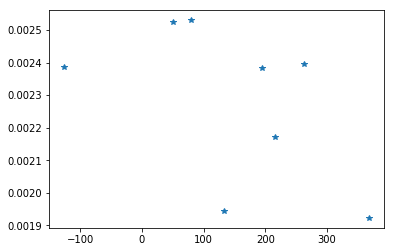

In [65]:
plt.plot(latitudes, velocities, '*')